<a href="https://colab.research.google.com/github/rodimendes/rest-analysis/blob/main/vendas2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e pastas - EXECUTAR

In [ ]:
import pandas as pd
import os
import pathlib
import sqlite3
import datetime as dt
import seaborn as sns

### Sandra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Rodrigo

In [ ]:
from google.colab import drive
drive.mount('/ShardDrives/')

Mounted at /ShardDrives/


# Formatando valores para todos o Dataframe - EXECUTAR

In [ ]:
pd.set_option('float_format', '{:,.2f}'.format)

# Células que não precisam ser executadas
As células dentro deste toggle não necessitam ser executadas após salvamento do arquivo tratado **'.pkl'**, em células abaixo.

## Renomeando arquivos 
**Desnecessário para estes arquivos** 

Executado e nomes alterados

In [ ]:
"""folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"
for file in os.listdir(folder):
    old_name = folder + file
    data = pd.read_excel(old_name)
    if file[:7] != 'vendas_':
      report_date = data['Unnamed: 1'][1][-10:]
      new_name = f"{folder}vendas_{report_date}.xlsx"
      os.rename(old_name, new_name)"""

## Data opening

### Sandra

In [ ]:
file = "/content/drive/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

OSError: ignored

### Rodrigo

In [ ]:
file = "/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

## Visão geral do dataframe

In [ ]:
data.head(10)

,Evolução de Vendas por Produto,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Séries: Todas,Data de Início: 01-01-2018,Data de Fim: 25-08-2022,NaN,NaN,NaN,NaN
5,Familia: Todas,Sub-Familia: Todas,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
8,2018-01-03 00:00:00,"100,002.00",Avenida,Bebidas / Cerveja,4.00,13.90,17.10
9,2018-01-03 00:00:00,"100,003.00",Batata Doce,Comida / Evento,9.00,41.42,46.80


## Limpeza inicial

In [ ]:
# Limpar linhas vazias e reiniciar o index

df = data.rename(columns=data.iloc[7]).iloc[8:-1].reset_index(drop=True)
df

,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
0,2018-01-03 00:00:00,"100,002.00",Avenida,Bebidas / Cerveja,4.00,13.90,17.10
1,2018-01-03 00:00:00,"100,003.00",Batata Doce,Comida / Evento,9.00,41.42,46.80
2,2018-01-03 00:00:00,"100,005.00",Berbigão,Comida / Pratos,9.00,42.83,48.40
3,2018-01-03 00:00:00,"100,012.00",Cp Dashi,Bebidas / Soft Drinks,1.00,3.10,3.50
4,2018-01-03 00:00:00,"100,022.00",Cp Phaunus Pet Nat,Bebidas / Espumantes,2.00,13.01,16.00
...,...,...,...,...,...,...,...
68219,2022-08-24 00:00:00,"101,431.00",Alheta Pescada,Comida / Especiais,4.00,60.18,68.00
68220,2022-08-24 00:00:00,"101,432.00",Leite Frito,Comida / Sobremesas,6.00,47.79,54.00
68221,2022-08-24 00:00:00,"101,450.00",Extra Tosta,Comida / Snacks,1.00,3.54,4.00
68222,2022-08-24 00:00:00,"101,454.00",Cereja,Comida / Sobremesas,1.00,6.64,7.50


In [ ]:
# Separando coluna Famila / Sub-Familia em duas

new_column = df['Familia / Sub-Familia'].str.split('/', n=1, expand=True)
df['familia'] = new_column[0].str.strip()
df['sub_familia'] = new_column[1].str.strip()

In [ ]:
# Renomeando colunas

df = df[['Data', 'Código', 'Produto', 'familia', 'sub_familia', 'Quantidade', 'Valor Total S/IVA', 'Valor Total']]
df.columns = ['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade', 'total_s_iva', 'total']

### Tratamento de colunas


In [ ]:
# Definindo o tipo adequado para as colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         68224 non-null  object
 1   codigo       68224 non-null  object
 2   produto      68224 non-null  object
 3   familia      68224 non-null  object
 4   sub_familia  68224 non-null  object
 5   quantidade   68224 non-null  object
 6   total_s_iva  68224 non-null  object
 7   total        68224 non-null  object
dtypes: object(8)
memory usage: 4.2+ MB


In [ ]:
df.data = pd.to_datetime(df.data)
df['codigo'] = pd.to_numeric(df['codigo'])
df['quantidade'] = pd.to_numeric(df['quantidade'])
df['total_s_iva'] = pd.to_numeric(df['total_s_iva'])
df['total'] = pd.to_numeric(df['total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         68224 non-null  datetime64[ns]
 1   codigo       68224 non-null  float64       
 2   produto      68224 non-null  object        
 3   familia      68224 non-null  object        
 4   sub_familia  68224 non-null  object        
 5   quantidade   68224 non-null  float64       
 6   total_s_iva  68224 non-null  float64       
 7   total        68224 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 4.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df.columns

Index(['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade',
       'total_s_iva', 'total'],
      dtype='object')

In [ ]:
# Verificar duplicados

df.duplicated().sum()

0

## Criação do Banco de Dados
**Etapa desnecessária para este caso de já termos o dataset completo e não ser necessário atualizar com novos dados**


In [ ]:
#bd = sqlite3.connect("vendas_restaurantes.db")

In [ ]:
#cursor = bd.cursor()

### A célula abaixo só é necessário executar na primeira vez, para a criação da tabela no banco de dados

In [ ]:
#cursor.execute("CREATE TABLE 'Vendas Restauração 2018_2022' (data INTEGER, codigo INT, produto TEXT, familia TEXT, sub_familia TEXT, quantidade INT, total_s_iva REAL, total REAL)")

In [ ]:
#df.head(2)

In [ ]:
#for index, row in df.iterrows():
#    data = row[0]
#    codigo = row[1]
#    produto = row[2]
#    familia = row[3]
#    sub_familia = row[4]
#    quantidade = row[5]
#    total_s_iva = row[6]
#    total = row[7]
#    cursor.execute('''INSERT INTO 'Vendas Restauração 2018_2022' \
#                    (data, codigo, produto, familia, sub_familia, quantidade, total_s_iva, total) VALUES (?,?,?,?,?,?,?,?)''', \
#                    (str(data), codigo, produto, familia, sub_familia, quantidade, total_s_iva, total))
#    
#    bd.commit()

# Rodrigo - EXECUTAR PARA COMEÇAR A ANÁLISE

In [ ]:
# Comando para salvar em formato .pkl

# pd.to_pickle(df, "/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl")

In [ ]:
df_vendas = '/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

# Sandra - EXECUTAR PARA COMEÇAR A ANÁLISE

In [ ]:
# Comando para salvar em formato .pkl

# pd.to_pickle(df, '/content/drive/MyDrive/Data Science/rest_data_extraction/base_de_dados/df_vendas.pkl')

In [ ]:
df_vendas = '/content/drive/MyDrive/Data Science/rest_data_extraction/base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

#**Primeiras explorações** - EXECUTAR

In [ ]:
# Faturamento total do período

faturamento_total = df_vendas.total.sum()
f'A empresa faturou {faturamento_total:,.2f} de euros durante o período'

'A empresa faturou 4,603,194.17 de euros durante o período'

In [ ]:
# Faturamento por família

faturamento_familia = df_vendas[['familia', 'total']].groupby(by='familia').sum()
faturamento_familia.sort_values(by='total', ascending=False)

,total
familia,
Comida,"3,058,871.40"
Bebidas,"1,464,298.98"
Outros,"79,387.59"
Talho,370.00
Sem Familia Definida,226.00
Peixaria,20.70
Mercearia,19.50


###Rentabilidade diária

In [ ]:
dt.date.isoweekday(df_vendas.data[0])

3

In [ ]:
# Criando uma lista com todos os dias de venda e atribuindo a uma nova coluna

dia_semana = []
for dia in df_vendas.data:
  dia_semana.append(dt.date.isoweekday(dia))

df_vendas['dia_semana'] = dia_semana
df_vendas.head(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3
1,2018-01-03,"100,003.00",Batata Doce,Comida,Evento,9.00,41.42,46.80,3


In [ ]:
rentabilidade_diaria = df_vendas[['quantidade','total', 'dia_semana']].groupby(by='dia_semana').sum()
rentabilidade_diaria

,quantidade,total
dia_semana,,
1,"2,342.00","31,823.80"
2,"4,147.00","47,654.04"
3,"92,440.01","744,466.71"
4,"104,169.00","888,494.16"
5,"130,162.00","1,082,017.64"
6,"132,789.00","1,089,471.37"
7,"90,730.00","719,266.45"


In [ ]:
# Rentabilidade diária, em ordem decrescente, para o período.

rentabilidade_diaria.sort_values(by='total', ascending=False)

,quantidade,total
dia_semana,,
6,"132,789.00","1,089,471.37"
5,"130,162.00","1,082,017.64"
4,"104,169.00","888,494.16"
3,"92,440.01","744,466.71"
7,"90,730.00","719,266.45"
2,"4,147.00","47,654.04"
1,"2,342.00","31,823.80"


In [ ]:
# Dia da semana possui mais entradas, ou seja, mais linhas.

df_vendas.dia_semana.value_counts()

5    14997
6    14638
4    13709
3    12233
7    11525
2      696
1      426
Name: dia_semana, dtype: int64

In [ ]:
## Por que as segundas e terças possuem valores muito baixos?
## Quais os dias e horários de funcionamento do restaurante?

In [ ]:
df_vendas[df_vendas['dia_semana'] == 1]

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
1375,2018-02-05,"100,131.00",Menu Grupo,Outros,,29.00,513.27,580.00,1
3218,2018-04-02,"100,317.00",Aluguer Espaço,Outros,,1.00,"1,500.00","1,845.00",1
3219,2018-04-02,"100,318.00",Jantar grupo privado,Outros,,40.00,"1,951.22","2,400.00",1
3220,2018-04-02,"100,319.00",Extra,Outros,,1.00,24.39,30.00,1
11200,2018-09-24,2.00,Porco Panado,Comida,Snacks,59.00,215.04,264.50,1
...,...,...,...,...,...,...,...,...,...
56992,2021-12-27,"101,406.00",G Wave,Bebidas,G Branco PT,1.00,32.52,40.00,1
56993,2021-12-27,"101,412.00",G Humus Curtimenta,Bebidas,G Branco PT,1.00,22.76,28.00,1
56994,2021-12-27,"101,413.00",Cp Sol Passito,Bebidas,Copo Outros,1.00,11.38,14.00,1
56995,2021-12-27,"101,418.00",G Capucha Cedro Alvarao,Bebidas,G Branco PT,1.00,40.65,50.00,1


#**Regressão Linear - Faturamento futuro**##

In [ ]:
# Bibliotecas para construção do modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
object_df = df_vendas.select_dtypes(include=['object']).copy()

In [ ]:
object_df

,produto,familia,sub_familia
0,Avenida,Bebidas,Cerveja
1,Batata Doce,Comida,Evento
2,Berbigão,Comida,Pratos
3,Cp Dashi,Bebidas,Soft Drinks
4,Cp Phaunus Pet Nat,Bebidas,Espumantes
...,...,...,...
68219,Alheta Pescada,Comida,Especiais
68220,Leite Frito,Comida,Sobremesas
68221,Extra Tosta,Comida,Snacks
68222,Cereja,Comida,Sobremesas


In [ ]:
anos = []
for dia in df_vendas['data']:
  year = dia.year
  anos.append(year)

print(len(anos))

68224


In [ ]:
df_vendas['ano'] = anos

In [ ]:
meses = []
for dia in df_vendas['data']:
  mes = dia.month_name()
  meses.append(mes)

print(len(meses))
print(meses[0])

68224
January


In [ ]:
df_vendas['mes'] = meses

In [ ]:
# Célula teste

df_vendas.sample(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano,mes
57156,2021-12-30,"100,092.00",Capuccino,Bebidas,Cha/Cafe,2.00,5.31,6.00,4,2021,December
34948,2020-01-11,"100,030.00",Extra Pão,Comida,Snacks,15.00,28.81,32.56,6,2020,January


In [ ]:
# Agrupar por anos e analisar ano a ano

df_2018 = df_vendas[df_vendas['ano'] == 2018]
df_2019 = df_vendas[df_vendas['ano'] == 2019]
df_2020 = df_vendas[df_vendas['ano'] == 2020]
df_2021 = df_vendas[df_vendas['ano'] == 2021]
df_2022 = df_vendas[df_vendas['ano'] == 2022]

In [ ]:
print(f'Ano 2018 - {df_2018.shape}')
print(f'Ano 2019 - {df_2019.shape}')
print(f'Ano 2020 - {df_2020.shape}')
print(f'Ano 2021 - {df_2021.shape}')
print(f'Ano 2022 - {df_2022.shape}')

Ano 2018 - (15713, 11)
Ano 2019 - (18731, 11)
Ano 2020 - (10630, 11)
Ano 2021 - (12220, 11)
Ano 2022 - (10930, 11)


In [ ]:
df_vendas[['quantidade', 'total', 'ano']].groupby(by='ano').sum()

,quantidade,total
ano,,
2018,"128,783.00","970,481.34"
2019,"172,435.00","1,354,907.69"
2020,"69,450.00","561,141.00"
2021,"95,049.01","831,493.13"
2022,"91,062.00","885,171.01"


## **Rodrigo - Análise e Regressão Linear para 2018**

Fazer modelo para todos os anos e verificar padrão.

### Imprimir gráfico por dia da semana ao longo do ano para perceber, por exemplo, qual quarta-feira teve maior lucro ao longo do ano. Mesmo caso para os outros dias da semana.

In [ ]:
df_2018.head(1)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano,mes
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3,2018,January


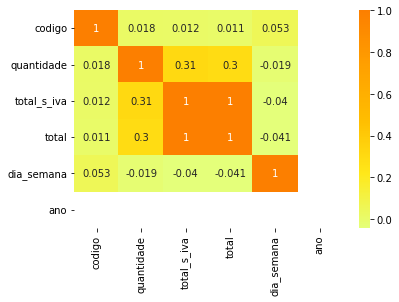

In [ ]:
sns.heatmap(df_2018.corr(), cmap='Wistia', annot=True);

In [ ]:
# Dividir as vendas por mês - Dataframe e gráfico - VER AULAS A PARTIR DE 78

vendas_mes_2018 = df_2018.groupby(df_2018['data'].dt.month_name()).sum().sort_values('total')[['total']]
vendas_mes_2018

,total
data,
March,"53,816.06"
February,"54,387.03"
November,"54,570.76"
January,"60,490.49"
April,"71,857.29"
July,"79,631.79"
June,"85,256.98"
May,"93,297.14"
August,"101,010.22"


In [ ]:
df_2018.groupby(by='dia_semana').sum()[['total']]

,total
dia_semana,
1,"16,688.90"
3,"181,295.15"
4,"197,110.28"
5,"222,724.87"
6,"240,708.38"
7,"111,953.76"


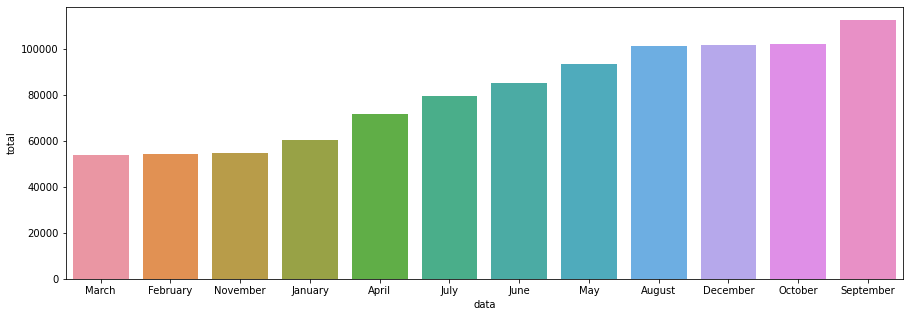

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=vendas_mes_2018.index, y=vendas_mes_2018['total']);

In [ ]:
graph = px.bar(data_frame=vendas_mes_2018, x=vendas_mes_2018.index, y='total', color='total', text='total', text_auto='.3s', hover_name=vendas_mes_2018.index)
graph.update_layout(coloraxis_showscale=False, xaxis_title='Meses', yaxis_title='Rendimento (€)')

# FAZER MAPA ABAIXO COM DIVISÃO POR FAMILIA EM CADA MES

In [ ]:
px.pie(data_frame=vendas_mes_2018, hole=0.5, values=vendas_mes_2018.total, names=vendas_mes_2018.index)

In [ ]:
# Dividir por família - Dataframe e gráfico

vendas_familia_2018 = df_2018.groupby(by=['familia', 'mes']).sum()[['total']]
vendas_familia_2018

total
familia mes                
Bebidas April     20,636.53
        August    33,115.01
        December  31,215.07
        February  16,101.20
        January   19,078.69
        July      24,983.45
        June      28,772.08
        March     16,516.92
        May       25,562.93
        November  18,983.88
        October   32,762.07
        September 39,193.38
Comida  April     46,385.76
        August    65,845.24
        December  70,321.15
        February  36,835.83
        January   39,583.80
        July      49,719.84
        June      54,024.90
        March     37,019.14
        May       56,353.21
        November  35,586.88
        October   63,376.98
        September 73,363.15
Outros  April      4,835.00
        August     2,049.97
        February   1,450.00
        January    1,828.00
        July       4,928.50
        June       2,460.00
        March        280.00
        May       11,381.00
        October    5,931.78

In [ ]:
df_2018['familia'].unique()

array(['Bebidas', 'Comida', 'Outros'], dtype=object)

In [ ]:
# Considerando todas as famílias

df_2018_data_total = df_2018[['data', 'total']].groupby(by='data').sum()

In [ ]:
df_2018_data_total.head()

,total
data,
2018-01-03,"1,249.02"
2018-01-04,"2,627.98"
2018-01-05,"2,891.90"
2018-01-06,"3,727.40"
2018-01-07,"3,457.17"


In [ ]:
px.line(df_2018_data_total, x=df_2018_data_total.index, y='total')

In [ ]:
df_2018_sem_outros = df_2018.loc[(df_2018['familia'] != 'Outros')]

In [ ]:
df_2018_sem_outros.shape

(15684, 11)

In [ ]:
df_2018_data_total_s_outros = df_2018_sem_outros[['data', 'total']].groupby(by='data').sum()
px.line(df_2018_data_total_s_outros, x=df_2018_data_total_s_outros.index, y='total')

In [ ]:
df_2018.shape

In [ ]:
df_2018_data_total[['total']].boxplot();

In [ ]:
teste_data_total = df_2018[['data', 'total']]

In [ ]:
df_2018[df_2018['data'] == '2018-05-10'].tail(50)

In [ ]:
# Agrupar por dia da semana e ver os dias mais rentáveis, sem outliers.
# Separar o dataframe e ver se é possível fazer previsões anuais.
# Continuar a ver os vídeos da Le Wagon sobre etapas da regressão linear.
# Incluir as "luas" para cada dia e ver se há relação entre lucro e as fases da lua.

#Sales Forecast Prediction – Python

######Linear regression model based on supervised learning

link: https://www.geeksforgeeks.org/sales-forecast-prediction-python/

In [ ]:
# Required Packages and Installation
import numpy as np                      # used to convert input into numpy arrays to be fed to the model
import matplotlib.pyplot as plt         # to plot/visualize sales data and sales forecasting
import tensorflow as tf                 # acts as the framework upon which this model is built
from tensorflow import keras            # defines layers and functions in the model

##### helper functions were used for processing the dataset and creating inputs of the required shape and size

##### date_to_enc: Encodes data into one-hot vectors, this provides a better learning opportunity for the model

##### converts the days of a week(monday,sunday,etc.) into one hot vectors and stores them as a dictionary

In [ ]:
#lists have been defined to hold different inputs
inp_day = []
inp_mon = []
inp_year = []
inp_week=[]
inp_hol=[]
out = []

# Comandos GITHUB

In [ ]:
# Fazer o git funcionar para o trabalho
"""
Para abrir:
  Clicar ARQUIVO >> ABRIR NOTEBOOK
  Selecionar a aba GITHUB e localizar o repositório 'rodimendes/rest-analysis', o branch MAIN e clicar no arquivo 'vendas2018_2022.ipynb'
Ao sair:
  Clicar ARQUIVO >> SALVAR UMA CÓPIA NO GITHUB
  Na janela que se abrirá, conferir repositório, branch e clicar em OK
"""

In [ ]:
# Agrupar por mês e analisar mês a mês (??)
# Agrupar por dia e analisar o dia a dia
# Fazer RL e identificar o comportamento da sazonalidade e a "outra"
# Fazer Time Series e comparar modelos
# meses = []
